In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [104]:
df = pd.read_csv('./datasets/ManyBalls2noL.csv', sep=',', header=None)
df.head()

,0,1
0,9.802,10.132
1,10.350,9.768
2,10.098,9.988
3,9.730,9.910
4,9.754,10.430


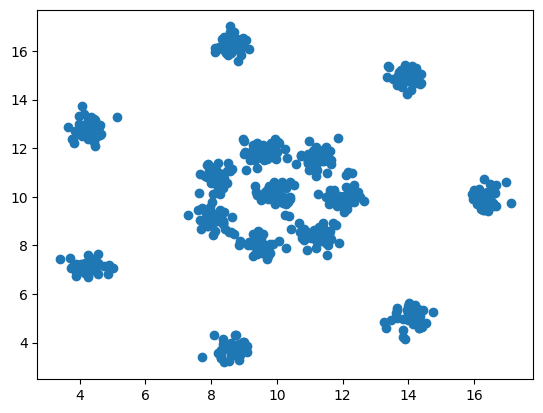

In [105]:
plt.scatter(df[0], df[1])

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans


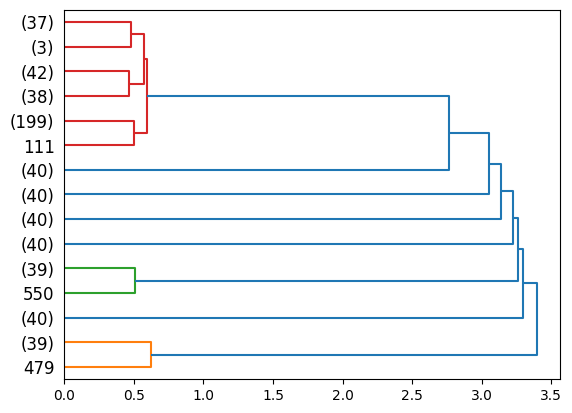

In [107]:
linkage_data = linkage(df, method='single', metric='euclidean')

dendrogram(linkage_data, truncate_mode='lastp', p=15, orientation='right')

plt.show()

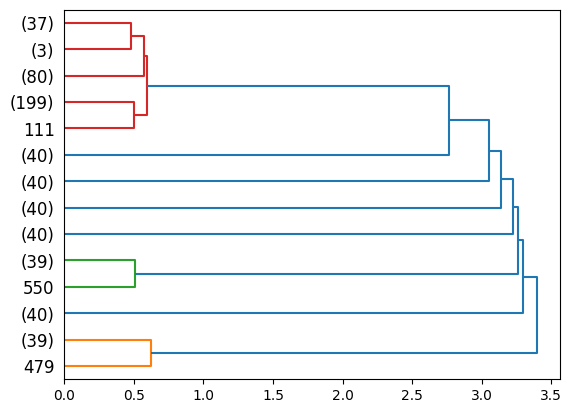

In [108]:
linkage_data = linkage(df, method='single', metric='euclidean')

dendrogram(linkage_data, truncate_mode='lastp', p=14, orientation='right')

plt.show()

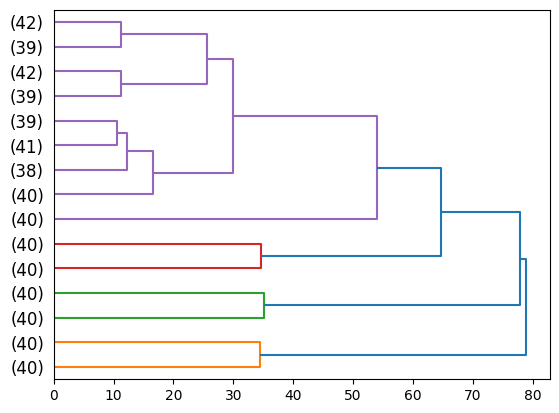

In [109]:
linkage_data = linkage(df, method='ward', metric='euclidean')

coloring = dendrogram(linkage_data, truncate_mode='lastp', p=15, orientation='right', get_leaves=True)

plt.show()

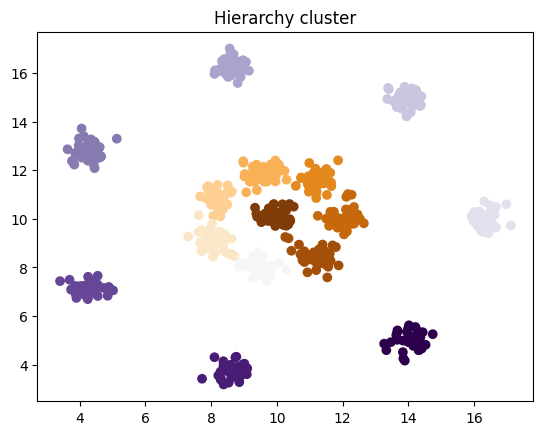

In [179]:
plt.scatter(df[0], df[1], c=cut_tree(linkage_data, n_clusters=15).flatten(), cmap='PuOr')
plt.title('Hierarchy cluster')
plt.show()

In [114]:
kmeans = KMeans(n_clusters=15).fit(df)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


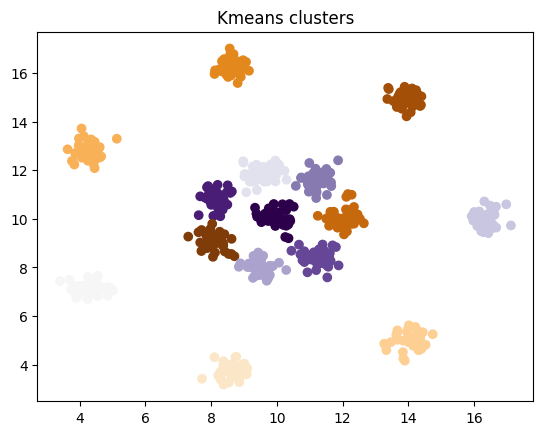

In [177]:
plt.scatter(df[0], df[1], c=kmeans.labels_, cmap='PuOr')
plt.title('Kmeans clusters')
plt.show()

In [122]:
hier_res = cut_tree(linkage_data, n_clusters=15).flatten()
kmeans_res = kmeans.labels_

In [121]:
df = pd.read_csv('./datasets/ManyBalls2.txt', sep='\t', header=None)
df.head()

,0,1,2
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1


In [123]:
df[2].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [125]:
kmeans_res += 1
hier_res += 1

In [143]:
df_res = pd.DataFrame(np.stack([kmeans_res, hier_res, df[2], np.ones(len(kmeans_res))]).T, columns=['kmeans', 'hier', 'true', 'amt'])
df_res.head()

,kmeans,hier,true,amt
0,15.0,1.0,1.0,1.0
1,15.0,1.0,1.0,1.0
2,15.0,1.0,1.0,1.0
3,15.0,1.0,1.0,1.0
4,15.0,1.0,1.0,1.0


In [160]:
df_mode = df_res.groupby(by=['true'], as_index=False).agg(pd.Series.mode)[['true', 'kmeans', 'hier']]
df_mode.columns = ['true', 'mode_kmeans', 'mode_hier']
df_res2 = df_res.merge(df_mode, on='true')

In [171]:
df_res2['wrong_hier'] = 1 * (df_res2.hier != df_res2.mode_hier)
df_res2[df_res2.hier != df_res2.mode_hier]

,kmeans,hier,true,amt,mode_kmeans,mode_hier,wrong_hier,wrong_kmeans
23,15.0,2.0,1.0,1.0,15.0,1.0,1,0
39,15.0,2.0,1.0,1.0,15.0,1.0,1,0
127,12.0,4.0,4.0,1.0,9.0,5.0,1,14
183,14.0,7.0,5.0,1.0,14.0,6.0,1,0
245,1.0,7.0,7.0,1.0,11.0,8.0,1,14


In [172]:
df_res2['wrong_kmeans'] = 1 * (df_res2.kmeans != df_res2.mode_kmeans)
df_res2[df_res2.kmeans != df_res2.mode_kmeans]

,kmeans,hier,true,amt,mode_kmeans,mode_hier,wrong_hier,wrong_kmeans
127,12.0,4.0,4.0,1.0,9.0,5.0,1,1
245,1.0,7.0,7.0,1.0,11.0,8.0,1,1


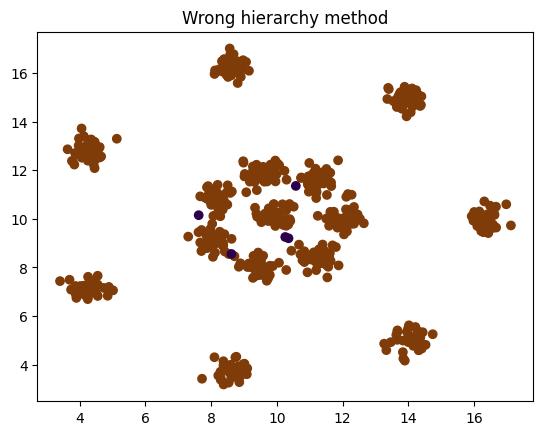

In [175]:
plt.scatter(df[0], df[1], c=df_res2.wrong_hier, cmap='PuOr')
plt.title('Wrong hierarchy method')
plt.show()

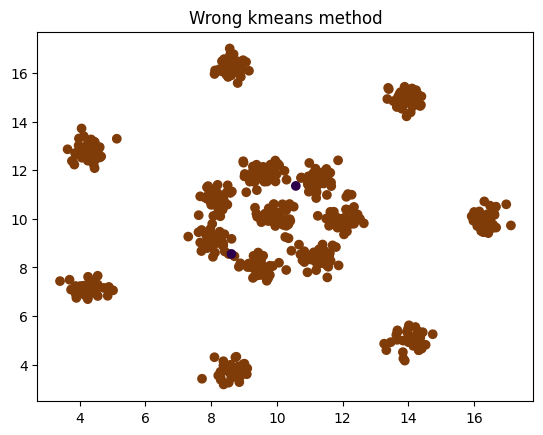

In [176]:
plt.scatter(df[0], df[1], c=df_res2.wrong_kmeans, cmap='PuOr')
plt.title('Wrong kmeans method')
plt.show()

# Task 2

In [234]:
from skfuzzy.cluster import cmeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [190]:
df = load_iris()
y = df['target']
y_names = df['target_names']
df = pd.DataFrame(df['data'], columns=df['feature_names'])

In [197]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


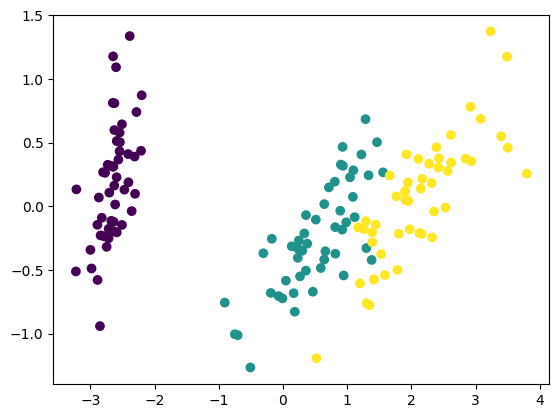

In [270]:
pca = PCA(n_components=2).fit(df.to_numpy())
df_pca = pca.transform(df.to_numpy()).T
plt.scatter(*df_pca, c=y, label=y_names)
plt.show()


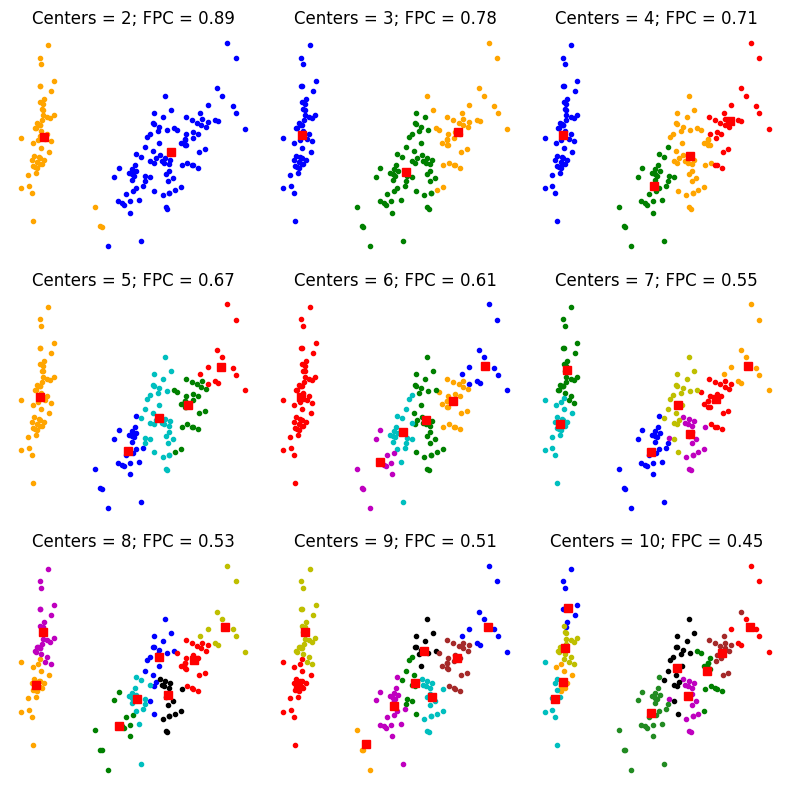

In [257]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))

fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = cmeans(
        df.to_numpy().T, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(df_pca[0][cluster_membership == j],
                df_pca[1][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pca.transform([pt])[0][0], pca.transform([pt])[0][1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

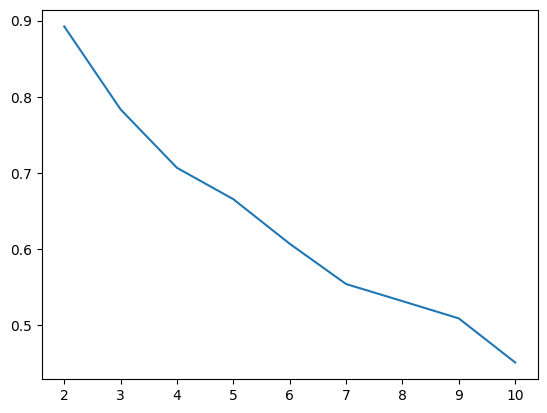

In [259]:
plt.plot(range(2, 11), fpcs)

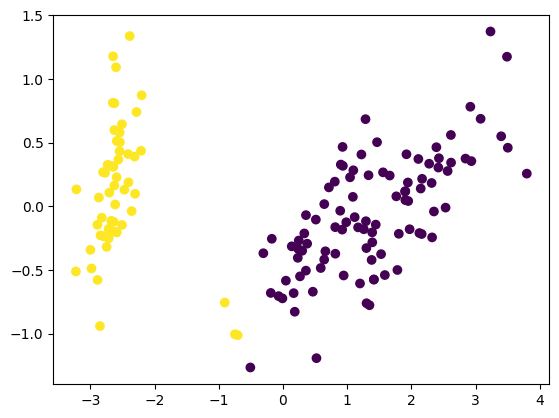

In [271]:
cntr, u, u0, d, jm, p, fpc = cmeans(
        df.to_numpy().T, c=2, m=2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
plt.scatter(*PCA(n_components=2).fit_transform(df).T, c=cluster_membership)

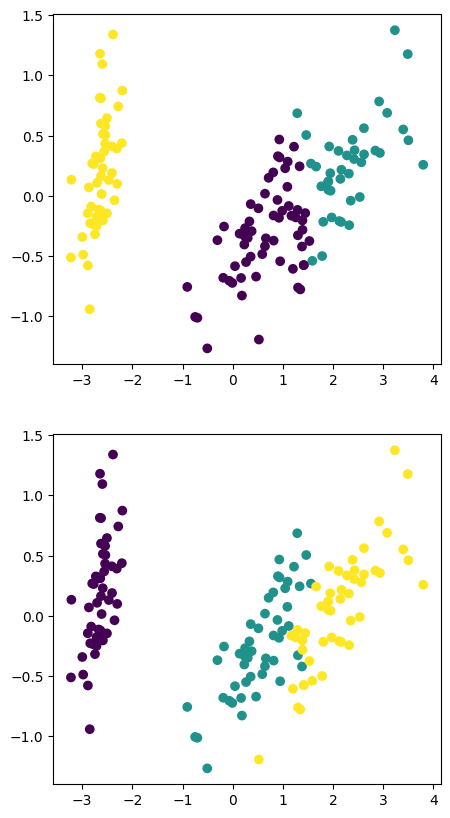

In [278]:
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
cntr, u, u0, d, jm, p, fpc = cmeans(
        df.to_numpy().T, c=3, m=2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
plt.scatter(*PCA(n_components=2).fit_transform(df).T, c=cluster_membership)

plt.subplot(2, 1, 2)
pca = PCA(n_components=2).fit(df.to_numpy())
df_pca = pca.transform(df.to_numpy()).T
plt.scatter(*df_pca, c=y, label=y_names)
plt.show()


In [285]:
d = {
    2: 0,
    0: 1,
    1: 2
}

np.mean(y != np.array(list(map(lambda x: d[x], cluster_membership)))) * df.shape[0]

16.0

# Task 3

In [11]:
from geopy.distance import distance
import kmedoids
from tqdm import tqdm

In [12]:
df = pd.read_csv('./datasets/gifts.csv')
df.head()

,GiftId,Latitude,Longitude,Weight
0,1,16.345769,6.303545,1.000000
1,2,12.494749,28.626396,15.524480
2,3,27.794615,60.032495,8.058499
3,4,44.426992,110.114216,1.000000
4,5,-69.854088,87.946878,25.088892


In [13]:
sample_size = 100
groups_amt = 3
km = kmedoids.KMedoids(groups_amt, method='fasterpam')
df_s = df.sample(sample_size)

dist_matrix = np.zeros((len(df_s), len(df_s)))

for i in tqdm(range(len(df_s))):
    for j in range(len(df_s)):
        dist_matrix[i][j] = distance((df_s.iloc[i]['Latitude'], df_s.iloc[i]['Longitude']), \
                                     (df_s.iloc[j]['Latitude'], df_s.iloc[j]['Longitude'])).km * df_s.iloc[j]['Weight']

c = km.fit(dist_matrix)

centers = c.medoid_indices_
dist_to_centers = np.zeros((len(df), len(centers)))

for i in tqdm(range(len(df))):
    for j in range(len(centers)):
        dist_to_centers[i][j] = distance((df.iloc[i]['Latitude'], df.iloc[i]['Longitude']), \
                                     (df_s.iloc[centers[j]]['Latitude'], df_s.iloc[centers[j]]['Longitude'])).km * df.iloc[i]['Weight']
        
group = np.argmin(dist_to_centers, axis=1)


100%|██████████| 100000/100000 [01:06<00:00, 1500.19it/s]


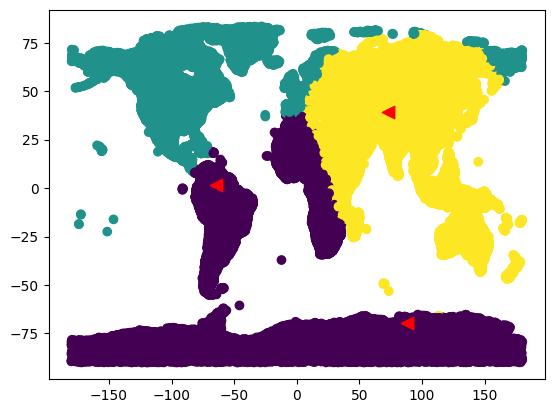

In [14]:
plt.scatter(df.Longitude, df.Latitude, c=group)
plt.scatter(df.Longitude[centers], df.Latitude[centers], marker='<', c='r', s=80)

In [5]:
from geopy.distance import distance
import kmedoids
from tqdm import tqdm

df = pd.read_csv('./datasets/gifts.csv')

sample_size1 = 1000
sample_size2 = 100
groups_amt = 3
repeats = 100
avg_distances = []
centers_total = []

for r in tqdm(range(repeats)):
    km = kmedoids.KMedoids(groups_amt, method='fasterpam')
    df_t = df.sample(sample_size1)
    df_s = df_t.sample(sample_size2)

    dist_matrix = np.zeros((len(df_s), len(df_s)))

    for i in range(len(df_s)):
        for j in range(len(df_s)):
            dist_matrix[i][j] = distance((df_s.iloc[i]['Latitude'], df_s.iloc[i]['Longitude']), \
                                        (df_s.iloc[j]['Latitude'], df_s.iloc[j]['Longitude'])).km * df_s.iloc[j]['Weight']

    c = km.fit(dist_matrix)
    centers = c.medoid_indices_

    if sorted(centers) not in centers_total:
        dist_to_centers = np.zeros((len(df_t), len(centers)))

        for i in range(len(df_t)):
            for j in range(len(centers)):
                dist_to_centers[i][j] = df_t.iloc[i]['Weight'] * distance((df_t.iloc[i]['Latitude'], df_t.iloc[i]['Longitude']), \
                                            (df_s.iloc[centers[j]]['Latitude'], df_s.iloc[centers[j]]['Longitude'])).km
                
        # group = np.argmax(dist_to_centers, axis=1)

        avg_distances.append(np.mean(dist_to_centers))
        centers_total.append(sorted(centers))

print(centers_total[np.argmin(avg_distances)])

 30%|███       | 30/100 [00:00<00:01, 46.95it/s]

100%|██████████| 100000/100000 [01:06<00:00, 1508.02it/s]


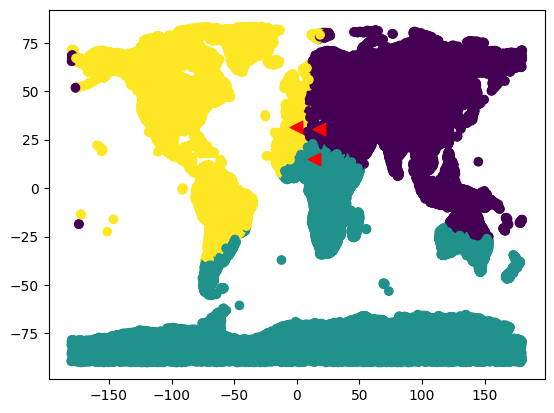

In [15]:
# sample_size1 = 1000
# sample_size2 = 100
# groups_amt = 3
# repeats = 100

ids = [31743, 51740, 97137]

centers = df[df.GiftId.isin(ids)].index

dist_to_centers = np.zeros((len(df), len(centers)))

for i in tqdm(range(len(df))):
    for j in range(len(centers)):
        dist_to_centers[i][j] = distance((df.iloc[i]['Latitude'], df.iloc[i]['Longitude']), \
                                     (df.iloc[centers[j]]['Latitude'], df.iloc[centers[j]]['Longitude'])).km * df.iloc[i]['Weight']
        
group = np.argmin(dist_to_centers, axis=1)

plt.scatter(df.Longitude, df.Latitude, c=group)
plt.scatter(df.Longitude[df.GiftId.isin(ids)], df.Latitude[df.GiftId.isin(ids)], marker='<', c='r', s=80)

100%|██████████| 100000/100000 [01:04<00:00, 1548.91it/s]


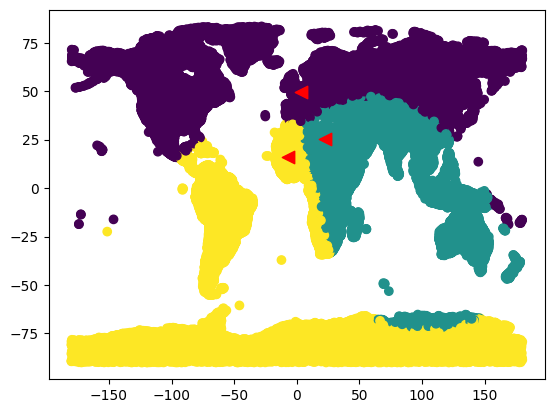

In [16]:
# sample_size1 = 1000
# sample_size2 = 150
# groups_amt = 3
# repeats = 100

ids = [65231, 82492, 21413]

centers = df[df.GiftId.isin(ids)].index

dist_to_centers = np.zeros((len(df), len(centers)))

for i in tqdm(range(len(df))):
    for j in range(len(centers)):
        dist_to_centers[i][j] = distance((df.iloc[i]['Latitude'], df.iloc[i]['Longitude']), \
                                     (df.iloc[centers[j]]['Latitude'], df.iloc[centers[j]]['Longitude'])).km * df.iloc[i]['Weight']
        
group = np.argmin(dist_to_centers, axis=1)

plt.scatter(df.Longitude, df.Latitude, c=group)
plt.scatter(df.Longitude[df.GiftId.isin(ids)], df.Latitude[df.GiftId.isin(ids)], marker='<', c='r', s=80)

In [5]:
# sample_size1 = 1000
# sample_size2 = 150
# groups_amt = 15
# repeats = 100

ids = [
    16061,
    36021,
    60533,
    78346,
    613,
    57623,
    23257,
    8267,
    88353,
    51281,
    15140,
    57368,
    13823,
    99264,
    4708
]

centers = df[df.GiftId.isin(ids)].index

dist_to_centers = np.zeros((len(df), len(centers)))

for i in tqdm(range(len(df))):
    for j in range(len(centers)):
        dist_to_centers[i][j] = distance((df.iloc[i]['Latitude'], df.iloc[i]['Longitude']), \
                                     (df.iloc[centers[j]]['Latitude'], df.iloc[centers[j]]['Longitude'])).km * df.iloc[i]['Weight']
        
group = np.argmin(dist_to_centers, axis=1)

plt.scatter(df.Latitude, df.Longitude, c=group, cmap='PuOr')
plt.scatter(df.Latitude[df.GiftId.isin(ids)], df.Longitude[df.GiftId.isin(ids)], marker='<', c='r', s=80)

  7%|▋         | 7207/100000 [00:23<05:03, 305.60it/s]

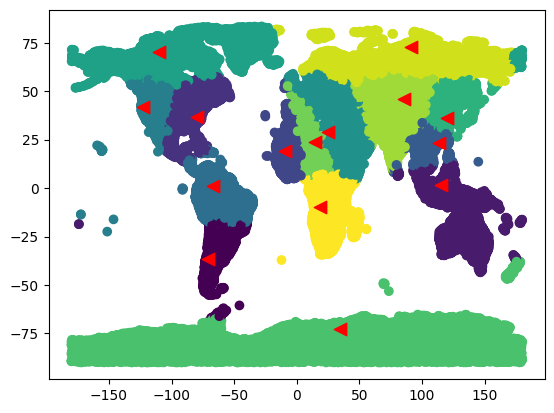

In [8]:
with open('./groups.txt', 'r') as f:
    group = list(map(lambda s: int(s.strip()), f.readlines()))

ids = [
    16061,
    36021,
    60533,
    78346,
    613,
    57623,
    23257,
    8267,
    88353,
    51281,
    15140,
    57368,
    13823,
    99264,
    4708
]

plt.scatter(df.Longitude, df.Latitude, c=group)
plt.scatter(df.Longitude[df.GiftId.isin(ids)], df.Latitude[df.GiftId.isin(ids)], marker='<', c='r', s=80)